In [1]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
mnist.train.num_examples

55000

In [9]:
mnist.test.num_examples

10000

In [10]:
mnist.validation.num_examples

5000

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
mnist.train.images.shape

(55000, 784)

In [19]:
mnist.train.images[1].shape

(784,)

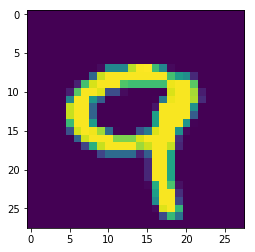

In [20]:
plt.imshow(mnist.train.images[1234].reshape(28,28))

In [21]:
mnist.train.images[1].max()

1.0

In [22]:
mnist.train.images[1].min()

0.0

In [23]:
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
x=tf.placeholder(tf.float32,shape=[None,784])

In [29]:
W=tf.Variable(tf.zeros([784,10]))

In [26]:
b=tf.Variable(tf.zeros([10]))

In [30]:
y=tf.matmul(x,W)+b

In [31]:
y_true=tf.placeholder(tf.float32,[None,10])

In [32]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [33]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [34]:
train=optimizer.minimize(cross_entropy)

In [35]:
init=tf.global_variables_initializer()

In [37]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_x,batch_y=mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    matches=tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    acc=tf.reduce_mean(tf.cast(matches,tf.float32))
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))
    


0.9172
